# Online retail transactions.

**Objective:** 
Build a customer clustering model that can be used by the online retailer to employ a more customer centric marketing approach.

In [100]:
# importing all necessary libraries

import pandas as pd
import numpy as np
import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# machine learning algorithms


# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# word cloud libraries
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Plot the Figures Inline
%matplotlib inline

# Get data

In [101]:
# import the online retailer transactions data
df = pd.read_excel('online_retail_II.xlsx')

In [102]:
# get a count of the data
df.shape

(525461, 8)

In [103]:
# let look peak at our data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [104]:
# check feature datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        525461 non-null object
StockCode      525461 non-null object
Description    522533 non-null object
Quantity       525461 non-null int64
InvoiceDate    525461 non-null datetime64[ns]
Price          525461 non-null float64
Customer ID    417534 non-null float64
Country        525461 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


# Explore data

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling.

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

In [105]:
# create a copy of our original dataset
retail = df.copy()

In [106]:
retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [107]:
# check for missing values
def missing_perc(data):
    perc = round(data.isnull().sum().sort_values(ascending =False)/(len(data)) * 100, 2)
    return perc

In [108]:
# check the percentage of missing values in each column of our data
missing_perc(retail)

Customer ID    20.54
Description     0.56
Country         0.00
Price           0.00
InvoiceDate     0.00
Quantity        0.00
StockCode       0.00
Invoice         0.00
dtype: float64

In [109]:
# describe the numeric colums
retail.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [110]:
# Before we proceed with feature exploration we create a new column called InvoiceValue (Quantity * Price)
retail['InvValue'] = retail['Quantity'] * retail['Price']

### Data Visualization

Lets view and explore each column in our data individually.

**Feature: Stockcode**

In [111]:
# total number of unique stock items
retail['StockCode'].nunique()

# learned: there are over 4632 different items sold in period for which this transactions data was recorded.

4632

**Feature: Description**

In [112]:
# total number of unique item descriptions
retail['Description'].nunique()

4681

In [113]:
# create a word cloud of the most occurring words / phrases in our product description
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate(str(retail['Description']))

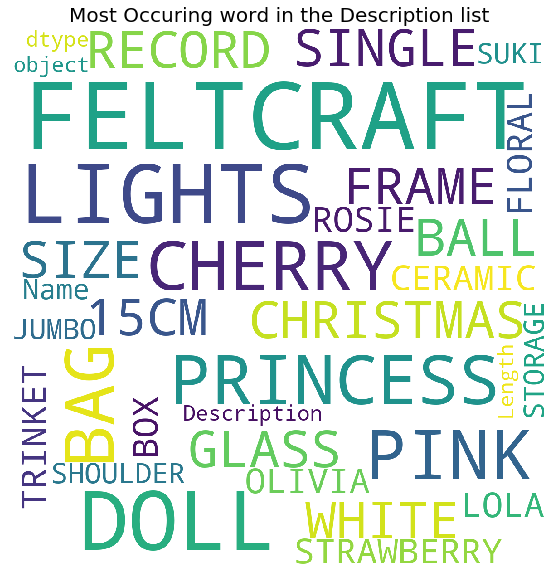

In [114]:
print(wordcloud)
plt.rcParams['figure.figsize'] = (10, 10)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

**Feature: Quantity**

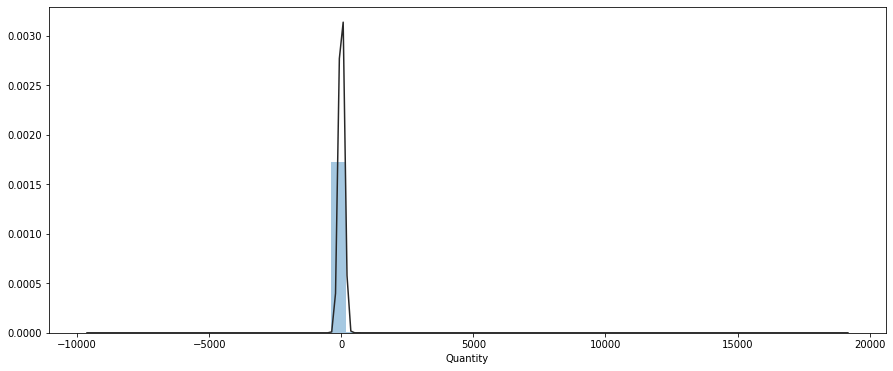

In [115]:
#check our quantity per transaction distribution.
plt.figure(figsize=(15,6))
sns.distplot(retail['Quantity'], fit=norm, kde=False)

**Feature: Invoice date**

In [116]:
# before exploration create a few new features
retail['InvoiceTime'] = retail['InvoiceDate'].dt.time
retail['InvoiceDate'] = retail['InvoiceDate'].dt.date

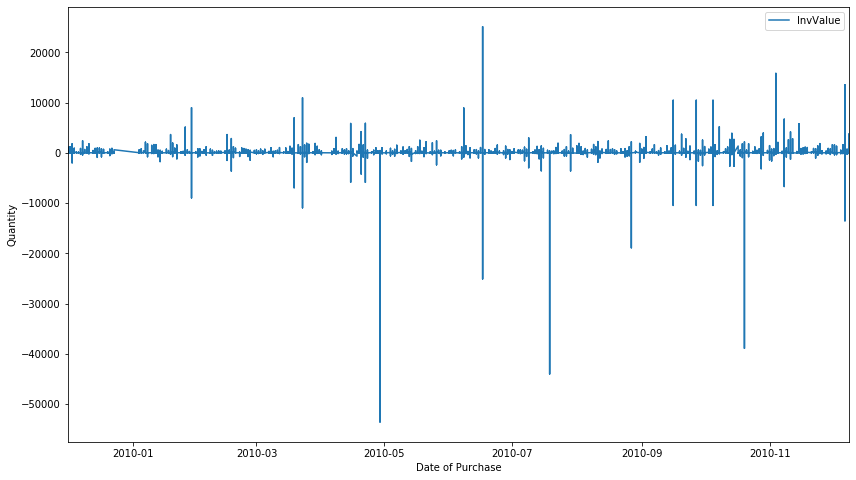

In [117]:
# transactions per date
plt.rcParams['figure.figsize'] = (14, 8)
retail.plot(x = 'InvoiceDate', y = 'InvValue')
plt.xlabel('Date of Purchase')
plt.ylabel('Quantity')
plt.show()

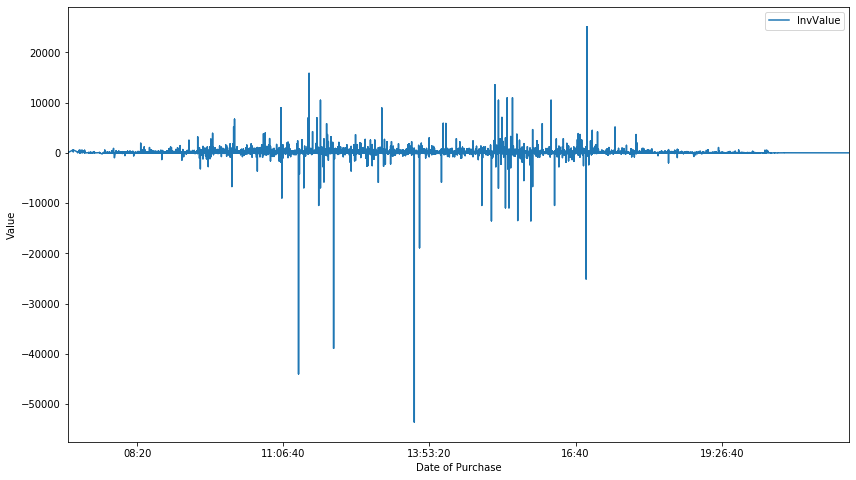

In [118]:
plt.rcParams['figure.figsize'] = (14, 8)
retail.plot(x = 'InvoiceTime', y = 'InvValue')
plt.xlabel('Date of Purchase')
plt.ylabel('Value')
plt.show()

**Feature: Price**

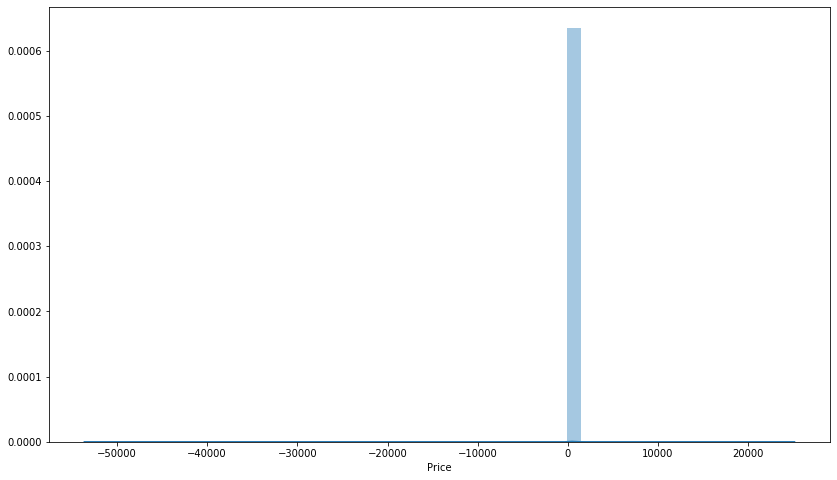

In [119]:
# check the distribution of our prices
sns.distplot(retail['Price'])

**Feature: Customer ID**

In [120]:
# number of unique customers
retail['Customer ID'].nunique()

4383

In [121]:
retail['Customer ID'].value_counts(normalize=True)

14911.0    0.013676
17841.0    0.012248
14606.0    0.009405
14156.0    0.006490
12748.0    0.006383
             ...   
15997.0    0.000002
18174.0    0.000002
15913.0    0.000002
13128.0    0.000002
15233.0    0.000002
Name: Customer ID, Length: 4383, dtype: float64

In [122]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvValue,InvoiceTime
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,07:45:00


**Feature: Country**

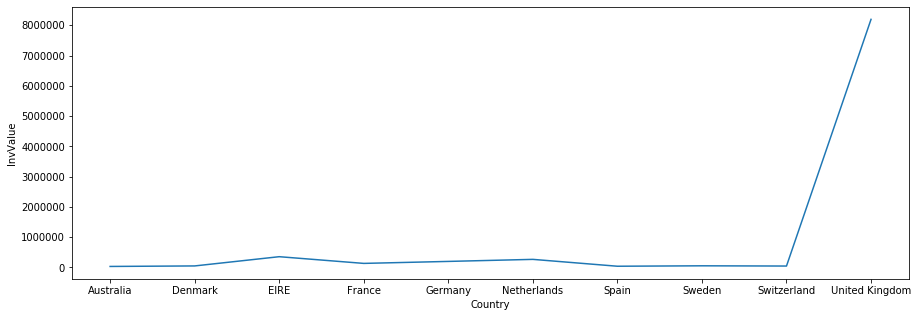

In [123]:
# top 10 countries in sales
country_top = retail.groupby(['Country']).agg({'InvValue': 'sum'}).reset_index().sort_values(by='InvValue', ascending=False)
plt.figure(figsize=(15,5))
sns.lineplot(x='Country', y='InvValue', data=country_top[:10])
plt.show()

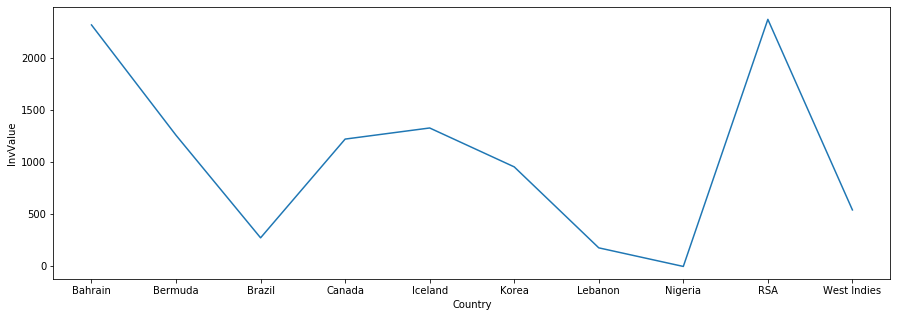

In [124]:
# top bottom countries
country_top = retail.groupby(['Country']).agg({'InvValue': 'sum'}).reset_index().sort_values(by='InvValue', ascending=False)
plt.figure(figsize=(15,5))
sns.lineplot(x='Country', y='InvValue', data=country_top[-10:])
plt.show()

In [125]:
retail['Country'].value_counts(normalize=True)

United Kingdom          0.924620
EIRE                    0.018403
Germany                 0.015470
France                  0.010985
Netherlands             0.005270
Spain                   0.002432
Switzerland             0.002259
Portugal                0.002095
Belgium                 0.002006
Channel Islands         0.001724
Sweden                  0.001717
Italy                   0.001391
Australia               0.001245
Cyprus                  0.001054
Austria                 0.001022
Greece                  0.000984
United Arab Emirates    0.000822
Denmark                 0.000815
Norway                  0.000702
Finland                 0.000674
Unspecified             0.000590
USA                     0.000464
Japan                   0.000426
Poland                  0.000369
Malta                   0.000327
Lithuania               0.000293
Singapore               0.000223
RSA                     0.000211
Bahrain                 0.000204
Canada                  0.000147
Thailand  

**Feature: InvValue**

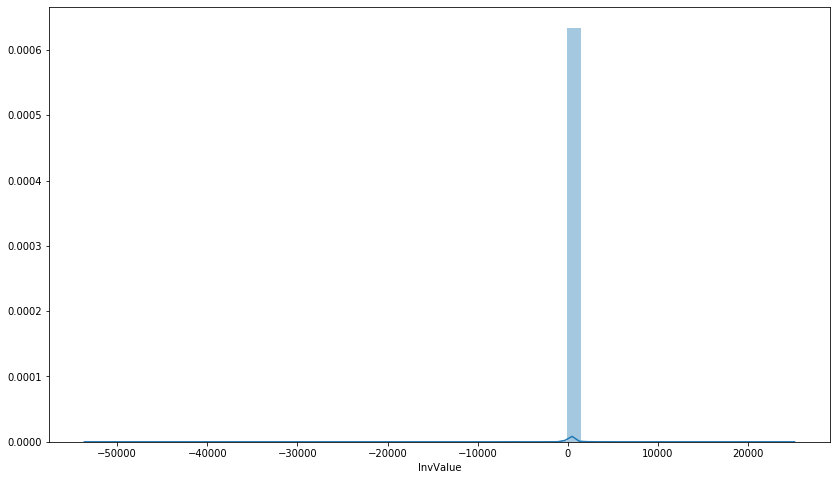

In [126]:
# check the distribution of our invoice amounts
sns.distplot(retail['InvValue'])

# Prepare the data

In [127]:
# check our nulls
missing_perc(retail)

Customer ID    20.54
Description     0.56
InvoiceTime     0.00
InvValue        0.00
Country         0.00
Price           0.00
InvoiceDate     0.00
Quantity        0.00
StockCode       0.00
Invoice         0.00
dtype: float64

In [128]:
# remove transactions that do not have a customer ID
null_index = retail[retail['Customer ID'].isnull()].index
retail.drop(null_index, inplace=True)

In [129]:
missing_perc(retail)

InvoiceTime    0.0
InvValue       0.0
Country        0.0
Customer ID    0.0
Price          0.0
InvoiceDate    0.0
Quantity       0.0
Description    0.0
StockCode      0.0
Invoice        0.0
dtype: float64

### RFM model

**Recency**

In [130]:
now = datetime.date(2011, 9, 12)
recency_agg = retail.groupby(by='Customer ID').agg({'InvoiceDate': 'max'}).reset_index()

In [131]:
recency_agg['Recency'] = recency_agg['InvoiceDate'].apply(lambda x: (now - x).days)
recency_agg.drop(['InvoiceDate'], axis=1, inplace=True)

In [132]:
recency_agg.head()

,Customer ID,Recency
0,12346.0,343
1,12347.0,279
2,12348.0,350
3,12349.0,319
4,12351.0,287


**Frequency**

In [133]:
# remove duplicate invoice where a customer bought more than one item per invoice
freq = retail.drop_duplicates(['Customer ID', 'Invoice'], keep='first')

In [134]:
freq_agg = freq.groupby(by='Customer ID').agg({'Invoice': 'count'}).reset_index().rename(columns={'Invoice': 'Frequency'})

In [135]:
freq_agg.head()

,Customer ID,Frequency
0,12346.0,15
1,12347.0,2
2,12348.0,1
3,12349.0,4
4,12351.0,1


**Monetary**

In [139]:
money_agg = retail.groupby(['Customer ID']).agg({'InvValue': 'sum'}).reset_index().rename(columns={'InvValue': 'Amount'})

In [140]:
money_agg

,Customer ID,Amount
0,12346.0,-64.68
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2646.99
4,12351.0,300.93
...,...,...
4378,18283.0,641.77
4379,18284.0,436.68
4380,18285.0,427.00
4381,18286.0,1188.43


In [143]:
# merge into a single table
final = recency_agg.merge(freq_agg, on='Customer ID').merge(money_agg, on='Customer ID')